In [115]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install matplotlib.pyplot
!pip install seaborn
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_excel("QVI_transaction_data.xlsx")

# Let's do some dataset cleaning first, including dealing with null_values and outliers, and format correction

In [118]:
df.shape

(264836, 8)

In [119]:
df.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
25275,43398,5,5119,5053,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8
176241,43420,83,83175,83084,51,Doritos Mexicana 170g,2,8.8
64228,43624,162,162039,162061,24,Grain Waves Sweet Chilli 210g,2,7.2
172445,43534,3,3332,2500,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
67580,43458,229,229229,231748,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2


In [120]:
df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [121]:
df.info() #as you can see the format of DATE column is interger, we need to convert it into date format; and we dont have any null value here in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [122]:
df.isna().sum()# Confirm that there are no null values in our dataset

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [123]:
df['DATE'] = pd.to_datetime(df['DATE'], unit='D', origin='1899-12-30')#Now we have already converted the format of DATE into datetime
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [124]:
df.sort_values(by='DATE', ascending=True)# Considering that i want to sort our value by the datetime

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
100938,2018-07-01,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7
65566,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1
43733,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
175455,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
205813,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4
...,...,...,...,...,...,...,...,...
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6
249581,2019-06-30,148,148317,148317,112,Tyrrells Crisps Ched & Chives 165g,1,4.2
78296,2019-06-30,212,212068,210874,113,Twisties Chicken270g,2,9.2
121166,2019-06-30,55,55029,48630,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6


In [125]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [126]:
df['PROD_NAME'].value_counts() 


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [127]:
import re

# We are going to remove all the digits and special charaters because we are not interested in it
all_words = df['PROD_NAME'].dropna().apply(lambda x: re.split(r'\s+', x))
all_words_flat = [word for sublist in all_words for word in sublist]


cleaned_words = [w for w in all_words_flat if w.isalpha()]

In [128]:
#Calculating the most common words in the product name
from collections import Counter
word_freq = Counter(cleaned_words)
top_words = word_freq.most_common(20)
top_words

[('Chips', 49770),
 ('Kettle', 41288),
 ('Smiths', 28860),
 ('Salt', 27976),
 ('Cheese', 27890),
 ('Pringles', 25102),
 ('Doritos', 24962),
 ('Crinkle', 23960),
 ('Corn', 22063),
 ('Original', 21560),
 ('Cut', 20754),
 ('Chip', 18645),
 ('Salsa', 18094),
 ('Chicken', 15407),
 ('Sea', 14145),
 ('Thins', 14075),
 ('Sour', 13882),
 ('Crisps', 12607),
 ('Vinegar', 12402),
 ('Chilli', 12389)]

In [129]:
#Looks like Salsa is not belong to chips, so we are going to remove it
df = df[~df['PROD_NAME'].str.lower().str.contains("salsa")]
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [130]:
df.info()# we can see that there is no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [131]:
df.describe()# Looks like there is an outlier which is 200 in the PROD_QTY column

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [132]:
df[df['PROD_QTY'] == 200]# There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer in the same store


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [133]:
df[df['LYLTY_CARD_NBR'] == 226000]
#It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [134]:
df.drop(df[df['LYLTY_CARD_NBR'] == 226000].index)
#It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


# Next, we will do some exploratory analysis of the overall performance of transactions, package_size and brand preference of our customers over the year

In [135]:
# There's only 364 rows, meaning only 364 dates which indicates a missing date
transaction_count_by_date = df.groupby('DATE').size().reset_index(name='transaction_count')
transaction_count_by_date

,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [136]:
# 1. Create a complete year from the beginning of 2018-07-01 to 2019-06-30
full_dates = pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30')})

# 2. Left join: keep all the dates, even though some dates have no record of transactions
full_transaction_data = full_dates.merge(transaction_count_by_date, on='DATE', how='left')

# 3. fill the nulls with zero(those days without transactions)
full_transaction_data['transaction_count'] = full_transaction_data['transaction_count'].fillna(0).astype(int)
full_transaction_data

#We can find that the only date which has no transactional record is 2018-12-25

,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
360,2019-06-26,657
361,2019-06-27,669
362,2019-06-28,673
363,2019-06-29,703


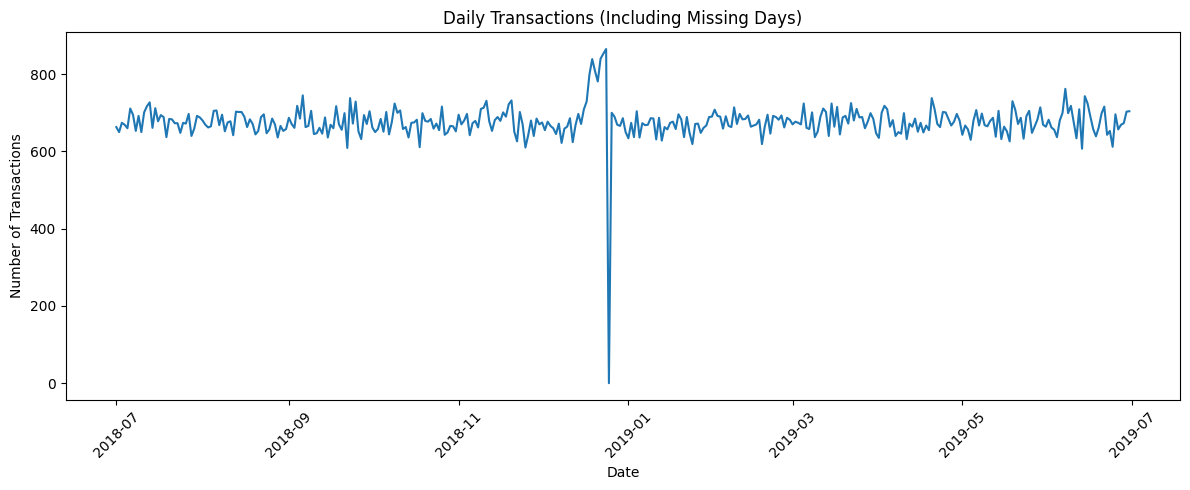

In [137]:
plt.figure(figsize=(12, 5))
plt.plot(full_transaction_data['DATE'], full_transaction_data['transaction_count'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transactions (Including Missing Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Now we can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.


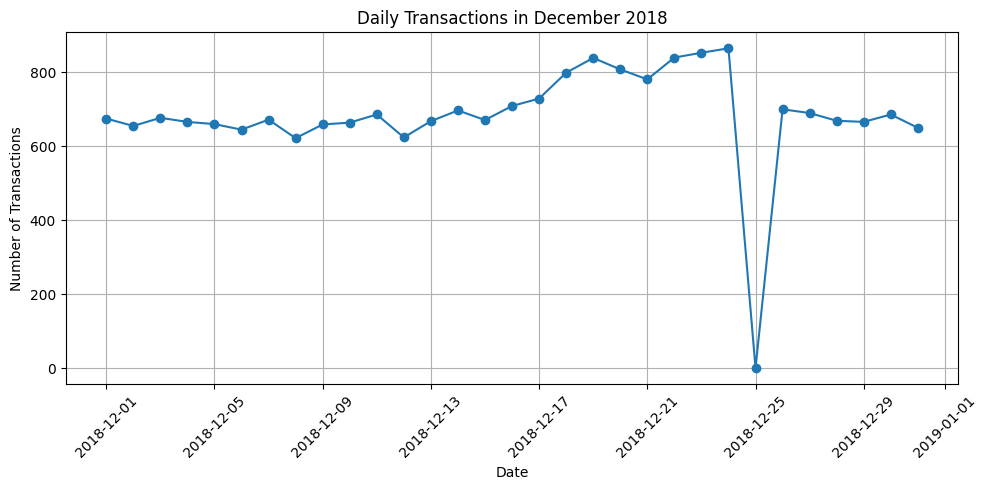

In [138]:
# 1. Filter the data in late December
december_data = full_transaction_data[
    (full_transaction_data['DATE'] >= '2018-12-01') &
    (full_transaction_data['DATE'] <= '2018-12-31')
]

# 2. plot the transaction of every day in December
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(december_data['DATE'], december_data['transaction_count'], marker='o')
plt.title('Daily Transactions in December 2018')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.


In [139]:
# Extract PACK_SIZE（the first number appears）
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)').astype(float)

# Check if the pack_sizes are resonable(from lowest to highest)
pack_size_summary = df.groupby('PACK_SIZE').size().reset_index(name='count').sort_values(by='PACK_SIZE')

pack_size_summary
# The largest size is 380g and the smallest size is 70g - seems sensible!

C:\Users\李君龙\AppData\Local\Temp\ipykernel_15912\455435963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)').astype(float)


,PACK_SIZE,count
0,70.0,1507
1,90.0,3008
2,110.0,22387
3,125.0,1454
4,134.0,25102
5,135.0,3257
6,150.0,40203
7,160.0,2970
8,165.0,15297
9,170.0,19983


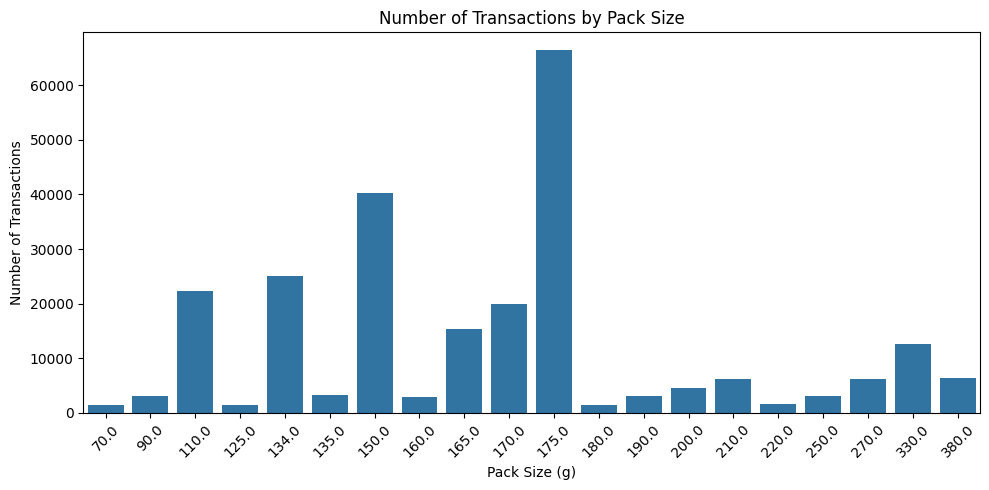

In [140]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PACK_SIZE', order=sorted(df['PACK_SIZE'].dropna().unique()))
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Pack Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Pack sizes created look reasonable and the visualization indicates that the pack size of 175g was bought the most over the year


In [141]:

multi_word_brands = ['Red Rock', 'Grain Waves', 'Natural Chip', 'Kettle']

def extract_brand(name):
    for brand in multi_word_brands:
        if name.startswith(brand):
            return brand
    return name.split()[0]

df['BRAND'] = df['PROD_NAME'].apply(extract_brand)
df['BRAND']

C:\Users\李君龙\AppData\Local\Temp\ipykernel_15912\2513265398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BRAND'] = df['PROD_NAME'].apply(extract_brand)


0         Natural Chip
1                  CCs
2               Smiths
3               Smiths
4               Kettle
              ...     
264831          Kettle
264832        Tostitos
264833         Doritos
264834         Doritos
264835        Tostitos
Name: BRAND, Length: 246742, dtype: object

In [142]:
df['BRAND'].value_counts().sort_values(ascending=False)

BRAND
Kettle          41288
Smiths          27390
Pringles        25102
Doritos         22041
Thins           14075
RRD             11894
Infuzions       11057
WW              10320
Cobs             9693
Tostitos         9471
Twisties         9454
Tyrrells         6442
Grain Waves      6272
Natural Chip     6050
Cheezels         4603
CCs              4551
Red Rock         4427
Dorito           3185
Infzns           3144
Smith            2963
Cheetos          2927
Snbts            1576
Burger           1564
Woolworths       1516
GrnWves          1468
Sunbites         1432
NCC              1419
French           1418
Name: count, dtype: int64

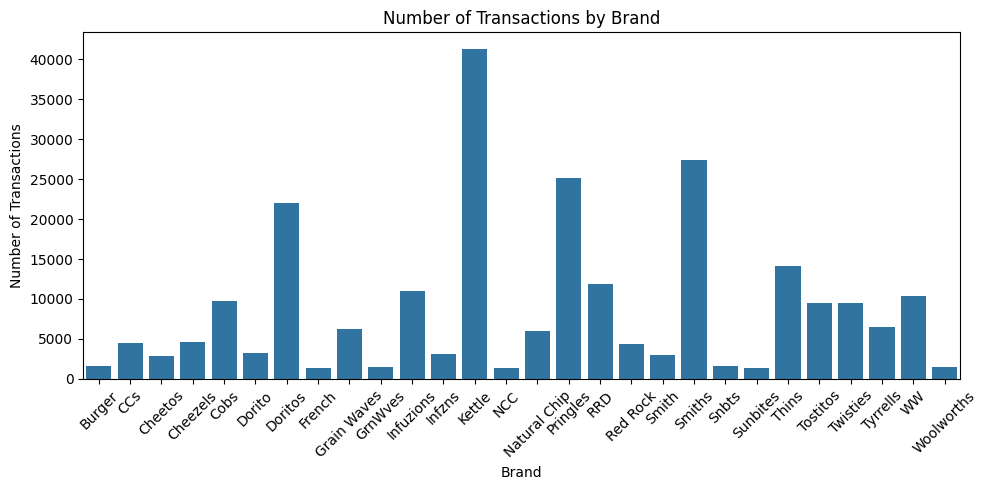

In [143]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='BRAND', order=sorted(df['BRAND'].dropna().unique()))
plt.xlabel('Brand')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Brand created look reasonable and the visualization indicates that the Brand of Kettle was bought the most over the year

# Next, we will do a deeper analysis diving into our customers segment

In [144]:
df1 = pd.read_csv("QVI_purchase_behaviour.csv")
df1

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [145]:
df1.shape

(72637, 3)

In [146]:
df1.info()# looks like the formats of the columns are all correct, no need for convertion 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [147]:
df1.isnull().sum()# Confirm that there are no null values in our dataset

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [148]:
data = pd.merge(df, df1, how='left')
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246737,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,YOUNG SINGLES/COUPLES,Premium
246738,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium
246739,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium
246740,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,YOUNG SINGLES/COUPLES,Premium


In [149]:
data.isnull().sum()
# As you can see there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Objective 1: Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

In [150]:
# summary the total sale by every segment of customers
sales_summary = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# sorting by tot_sales
sales_summary = sales_summary.sort_values(by='TOT_SALES', ascending=False)
sales_summary

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


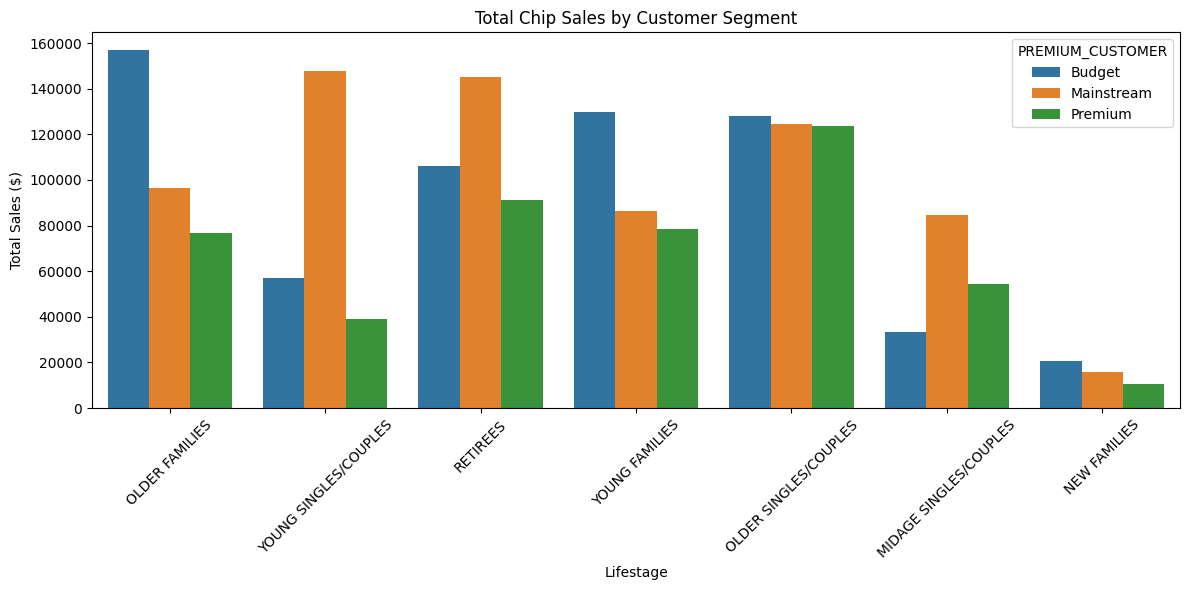

In [151]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_summary,
            x='LIFESTAGE',
            y='TOT_SALES',
            hue='PREMIUM_CUSTOMER')

plt.title('Total Chip Sales by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# As you can see from the plot below, Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

## Objective 2: How many customers are in each segment

In [152]:
# Calculating the amount of customers who bought chips of every LIFESTAGE + PREMIUM_CUSTOMER (the unique LYLTY_CARD_NBR）
customer_counts = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customer_counts = customer_counts.rename(columns={'LYLTY_CARD_NBR': 'NUM_CUSTOMERS'})
customer_counts

,LIFESTAGE,PREMIUM_CUSTOMER,NUM_CUSTOMERS
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2232
9,OLDER SINGLES/COUPLES,Budget,4849


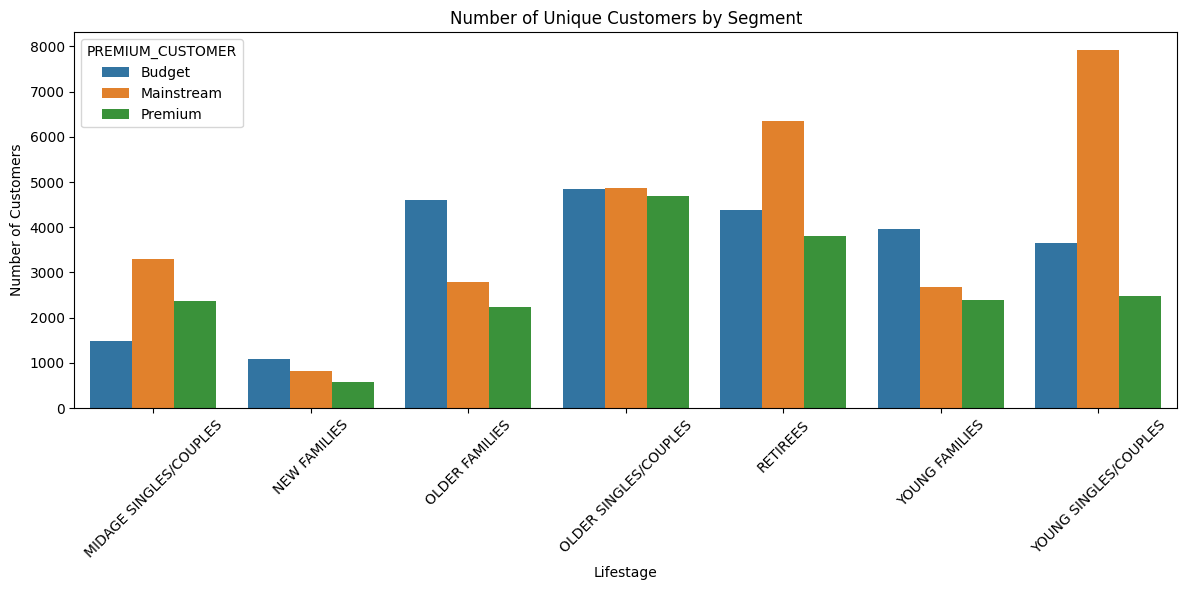

In [153]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_counts,
            x='LIFESTAGE',
            y='NUM_CUSTOMERS',
            hue='PREMIUM_CUSTOMER')

plt.title('Number of Unique Customers by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# As you can see from the plot below, There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.


## Obejective 3: How many chips are bought per customer by segment

In [154]:
# Total_units purchased
total_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# The amount of customers
unique_customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
unique_customers = unique_customers.rename(columns={'LYLTY_CARD_NBR': 'NUM_CUSTOMERS'})

# Combine two charts
avg_units = pd.merge(total_units, unique_customers, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])

# averagr units per customer
avg_units['AVG_UNITS_PER_CUSTOMER'] = avg_units['PROD_QTY'] / avg_units['NUM_CUSTOMERS']
avg_units

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,NUM_CUSTOMERS,AVG_UNITS_PER_CUSTOMER
0,MIDAGE SINGLES/COUPLES,Budget,8883,1474,6.026459
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,3298,6.432080
2,MIDAGE SINGLES/COUPLES,Premium,14400,2369,6.078514
3,NEW FAMILIES,Budget,5241,1087,4.821527
4,NEW FAMILIES,Mainstream,4060,830,4.891566
5,NEW FAMILIES,Premium,2769,575,4.815652
6,OLDER FAMILIES,Budget,41853,4611,9.076773
7,OLDER FAMILIES,Mainstream,25804,2788,9.255380
8,OLDER FAMILIES,Premium,20639,2232,9.246864
9,OLDER SINGLES/COUPLES,Budget,32883,4849,6.781398


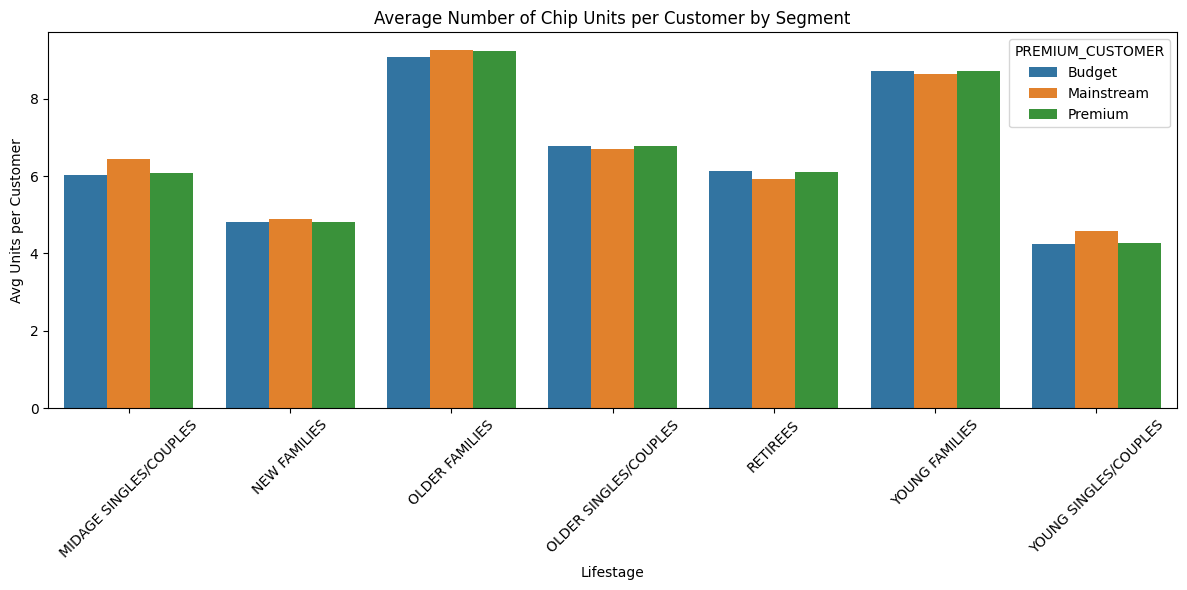

In [155]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_units,
            x='LIFESTAGE',
            y='AVG_UNITS_PER_CUSTOMER',
            hue='PREMIUM_CUSTOMER')

plt.title('Average Number of Chip Units per Customer by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Avg Units per Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# As you can see from the plot below, Older families and young families in general buy more chips per customer

## Objective 4: What's the average chip price by customer segment 

In [156]:
# 1. The total sales of every group
total_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# 2. The total units of every group
total_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# 3. Combine two charts
avg_price = pd.merge(total_sales, total_units, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])

# 4. Calculating the average price for chips
avg_price['AVG_UNIT_PRICE'] = avg_price['TOT_SALES'] / avg_price['PROD_QTY']
avg_price

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,AVG_UNIT_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,8883,3.753878
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,21213,3.994449
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,14400,3.780823
3,NEW FAMILIES,Budget,20607.45,5241,3.931969
4,NEW FAMILIES,Mainstream,15979.70,4060,3.935887
5,NEW FAMILIES,Premium,10760.80,2769,3.886168
6,OLDER FAMILIES,Budget,156863.75,41853,3.747969
7,OLDER FAMILIES,Mainstream,96413.55,25804,3.736380
8,OLDER FAMILIES,Premium,76542.60,20639,3.708639
9,OLDER SINGLES/COUPLES,Budget,127833.60,32883,3.887529


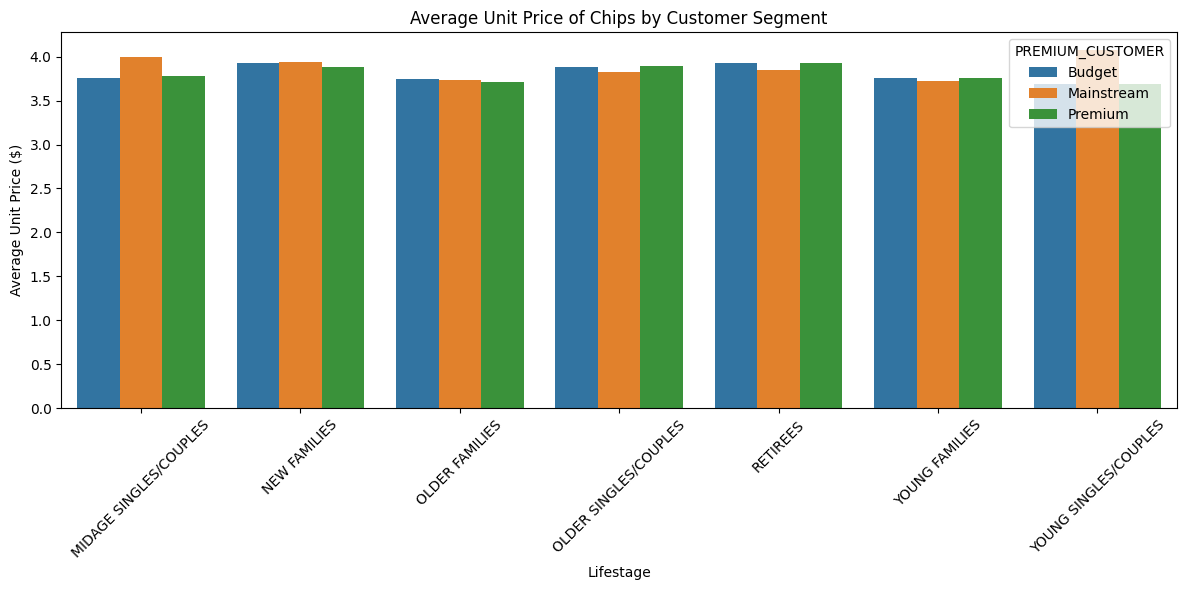

In [157]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price,
            x='LIFESTAGE',
            y='AVG_UNIT_PRICE',
            hue='PREMIUM_CUSTOMER')

plt.title('Average Unit Price of Chips by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Unit Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# As you can see from the below plot, Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles andcouples buying chips compared to their mainstream counterparts.

# And next, i think we should deeply dive into the segment which contribute the most in total sale, analysing their purchasing behaviours and give corresponding recommendations


In [158]:
# Identify segment with highest total sales
top_segment = avg_price.sort_values('TOT_SALES', ascending=False).iloc[0]
print("Top segment:", top_segment['LIFESTAGE'], "-", top_segment['PREMIUM_CUSTOMER'])

Top segment: OLDER FAMILIES - Budget


In [159]:
segment_data = data[
    (data['LIFESTAGE'] == top_segment['LIFESTAGE']) &
    (data['PREMIUM_CUSTOMER'] == top_segment['PREMIUM_CUSTOMER'])
]
segment_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
29896,2018-07-21,77,2330461,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110.0,Infuzions,OLDER FAMILIES,Budget
29897,2019-05-20,1,1367,424,7,Smiths Crinkle Original 330g,1,5.7,330.0,Smiths,OLDER FAMILIES,Budget
29898,2018-08-17,3,3088,1462,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,OLDER FAMILIES,Budget
29899,2018-08-14,3,3147,1698,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smiths,OLDER FAMILIES,Budget
29900,2019-05-16,3,3206,1979,71,Twisties Cheese Burger 250g,1,4.3,250.0,Twisties,OLDER FAMILIES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
51405,2018-08-08,272,272353,270147,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,OLDER FAMILIES,Budget
51406,2018-12-24,272,272353,270148,114,Kettle Sensations Siracha Lime 150g,2,9.2,150.0,Kettle,OLDER FAMILIES,Budget
51407,2019-04-23,272,272353,270149,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110.0,Cobs,OLDER FAMILIES,Budget
51408,2019-05-08,272,272357,270153,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,OLDER FAMILIES,Budget


## What Brands They usually Buy

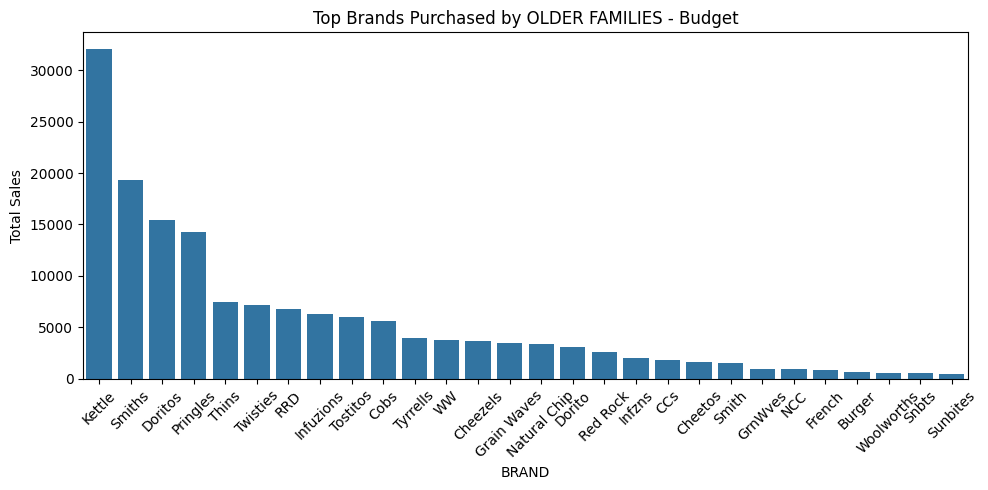

In [160]:
brand_sales = segment_data.groupby('BRAND')['TOT_SALES'].sum().reset_index()
brand_sales = brand_sales.sort_values(by='TOT_SALES', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=brand_sales, x='BRAND', y='TOT_SALES')
plt.title('Top Brands Purchased by ' + top_segment['LIFESTAGE'] + ' - ' + top_segment['PREMIUM_CUSTOMER'])
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


## Their Pack Size Preferences

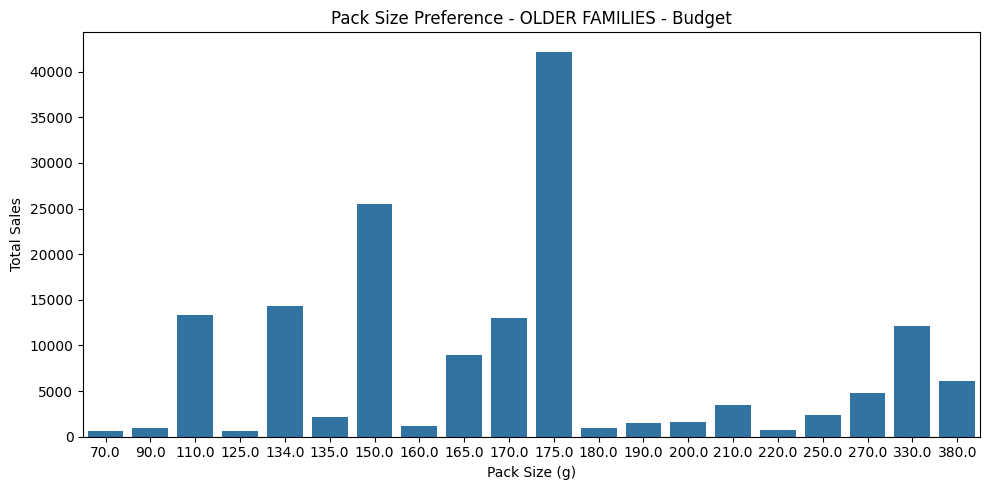

In [161]:
packsize_sales = segment_data.groupby('PACK_SIZE')['TOT_SALES'].sum().reset_index()
packsize_sales = packsize_sales.sort_values(by='PACK_SIZE')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=packsize_sales, x='PACK_SIZE', y='TOT_SALES')
plt.title('Pack Size Preference - ' + top_segment['LIFESTAGE'] + ' - ' + top_segment['PREMIUM_CUSTOMER'])
plt.xlabel('Pack Size (g)')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


## key recommendations:
The analysis reveals that the Older Families – Budget segment is the top contributor to overall chip sales, driven by a strong preference for medium-sized packs—particularly 175g, 150g, and 134g—and a marked loyalty to brands like Kettle, Smiths, and Doritos. Despite relatively consistent unit pricing across segments, this group purchases chips in higher volumes per customer, significantly boosting revenue. Based on these insights, it is recommended to prioritize inventory and in-store display of 175g and 150g packs of Kettle and Smiths in locations with a high presence of Older Families. Targeted promotions such as value bundles or discounts should be designed to appeal to their budget-conscious nature while reinforcing trust in familiar brands. Marketing efforts should focus on messaging that highlights convenience, family sharing, and affordability, delivered through both digital and in-store channels. Additionally, similar strategies can be extended to segments like Retirees and Older Singles/Couples, who also exhibit strong chip consumption behaviors.